In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("..")

In [3]:
# Load dataset

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X = StandardScaler().fit_transform(data["data"])
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape

((455, 30), (455,))

In [4]:
# Build model

from models.logistic_regressor import LogisticRegressor

m = LogisticRegressor().fit(X_train, y_train, n_iter=100, eta=1.0e-3, lmd=0.5)

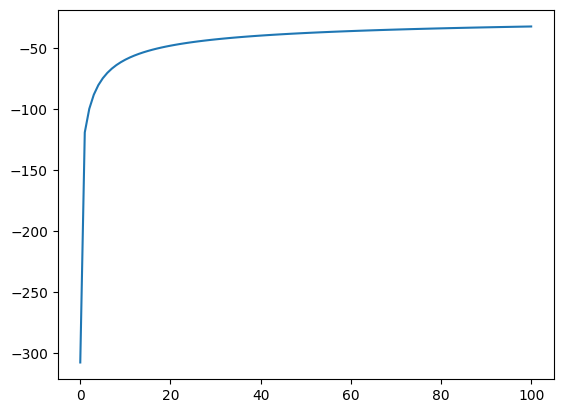

In [5]:
# Learning curve
# maximizing the log likelihood of the model

plt.plot(m.loglik_list)

In [6]:
# Accuracy score

from sklearn.metrics import accuracy_score

y_hat = m.predict_label(X_test)
accuracy_score(y_test, y_hat)

0.9824561403508771

# Comparing to scikit-learn's implementation

In [7]:
from sklearn.linear_model import LogisticRegression

s = LogisticRegression().fit(X_train, y_train)
accuracy_score(y_test, s.predict(X_test))

0.9649122807017544

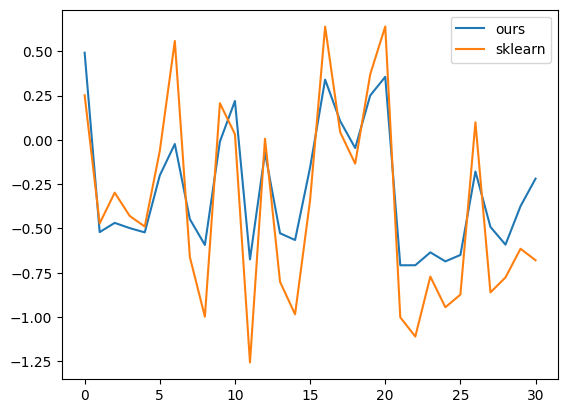

In [8]:
# Comparing weights

plt.plot(m.w, label="ours")
plt.plot(np.append(s.intercept_, s.coef_), label="sklearn")
plt.legend()